In [27]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
#Import the requests library
import requests
#Import the API key.
from config import weather_api_key

In [28]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
#Add the latitude and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-10.987200641723888 120.04550925011716
83.15273565095205 -14.779740888953256
13.026577905664354 -127.39644932276062
54.925317853924696 32.48374867153902
12.28350326351466 92.88436747569881
-72.20006400734135 -21.686907922663323
37.528552633462795 -140.5255768093614
-43.429234623239076 -51.51001476011274
-38.45515269293382 108.69681495451971
3.741284214550987 75.26105873822232
9.82569069534577 85.09517001663113
-40.873635078410445 28.83302725822159
-25.132078966480037 -144.41721533781111
-36.14969374275619 -0.978445920441942
28.108767699337108 85.76117931643631
-58.63483701598237 162.51530226582878
-31.170559488184125 -83.93206396001638
-58.25889162844964 114.77994020076142
21.025748956419505 -95.69273953428653
44.392191214446655 -103.18743304247846
0.07664443125079856 -39.303080141335926
83.1123374774613 41.1338450211224
81.6975683167924 138.61024520996614
40.74521163967742 -31.388506164713334
-84.4285971832876 -19.160797449492435
-3.8710062890428674 169.05470186919808
-44.326317180849

19.15429742421793 -47.62712577981674
-14.382389722569755 112.13187530097855
-41.62536598846205 120.11111572008605
23.701730693473365 95.94186546686791
46.11793824019287 -3.106404801106237
9.235683144210114 21.218364685240317
-1.5450728576722668 158.3652356503875
85.24493184882985 -85.08580409186915
12.933095649859325 -149.99674191806938
-28.590811274814193 -159.68463690475585
-55.639229091065715 137.2994608518415
-86.57045244009547 156.11279841092505
-58.679567614379366 -144.56315844711355
-16.593075827755584 80.2894423871436
-52.92877576111816 67.42139015208653
-67.03595355155755 -117.22856454932297
18.507375702575857 109.97081210189191
61.13954556894467 -81.07032284531681
72.11639576047938 -57.8139550864706
-17.285569528134147 128.88113828568578
-15.54590749711204 167.68689581927129
-57.51531521704576 51.68445979747867
77.57858550561915 -64.779657748722
-21.255147499937834 -135.38402441082903
27.649082512247787 -157.91655059081802
18.69291227810021 -165.78202906909098
-21.59929984063

In [31]:
from citipy import citipy

In [32]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

610

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [34]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print('Beginning Data Retrieval        ')
print('--------------------------------')
#Create counters
record_count = 1
set_count = 1
#Loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count.
    record_count += 1
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the data to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        #If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
#Indicate that Data Loading is complete.
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | waingapu
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | kardymovo
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 10 of Set 1 | batticaloa
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | banepa
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nautla
Processing Record 19 of Set 1 | rapid city
Processing Record 20 of Set 1 | itarema
Processing Record 21 of Set 1 | ostrovnoy
Processing Re

Processing Record 34 of Set 4 | kruisfontein
Processing Record 35 of Set 4 | kenai
Processing Record 36 of Set 4 | phangnga
Processing Record 37 of Set 4 | sunndalsora
Processing Record 38 of Set 4 | port macquarie
Processing Record 39 of Set 4 | kununurra
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | santa isabel do rio negro
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | roald
Processing Record 44 of Set 4 | boca do acre
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | evensk
Processing Record 48 of Set 4 | mindelo
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | lagoa
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | moyobamba
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | ojinaga
Processing Record 5 of Set 5 | henties bay
Processing Record 6 of Set 5 | krasnoselkup
Pr

Processing Record 28 of Set 8 | igra
Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | severo-kurilsk
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | finnsnes
Processing Record 35 of Set 8 | kaputa
Processing Record 36 of Set 8 | macusani
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | methoni
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | sinkat
City not found. Skipping...
Processing Record 41 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 8 | chitaga
Processing Record 43 of Set 8 | manokwari
Processing Record 44 of Set 8 | nerchinskiy zavod
Processing Record 45 of Set 8 | klaksvik
Processing Record 46 of Set 8 | kailua
Processing Record 47 of Set 8 | cordoba
Processing Record 48 of Set 8 | aswan
Processing Record 49 of Set 8 | kaili
Proces

Processing Record 12 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 13 of Set 12 | kerouane
Processing Record 14 of Set 12 | natal
Processing Record 15 of Set 12 | rayagada
Processing Record 16 of Set 12 | svetlaya
Processing Record 17 of Set 12 | somerset
Processing Record 18 of Set 12 | miri
Processing Record 19 of Set 12 | grand-santi
Processing Record 20 of Set 12 | omsukchan
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | swift current
Processing Record 23 of Set 12 | luau
Processing Record 24 of Set 12 | vostok
Processing Record 25 of Set 12 | kipushi
Processing Record 26 of Set 12 | sibu
Processing Record 27 of Set 12 | sheridan
Processing Record 28 of Set 12 | velika plana
Processing Record 29 of Set 12 | xai-xai
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | tena
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | umtata
Processing Record 34 of Set

In [36]:
print(len(city_data))

560


In [37]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waingapu,-9.6567,120.2641,77.29,83,82,8.23,ID,2022-05-20 18:47:08
1,Constitucion,-35.3333,-72.4167,58.75,69,0,5.44,CL,2022-05-20 18:47:09
2,Kardymovo,54.8902,32.4311,46.27,95,100,6.82,RU,2022-05-20 18:47:09
3,Port Blair,11.6667,92.7500,82.44,89,100,11.50,IN,2022-05-20 18:47:09
4,Mar Del Plata,-38.0023,-57.5575,61.95,60,0,18.41,AR,2022-05-20 18:42:55
5,Fortuna,40.5982,-124.1573,64.85,57,0,13.80,US,2022-05-20 18:47:10
6,Busselton,-33.6500,115.3333,56.07,84,2,7.49,AU,2022-05-20 18:47:10
7,Batticaloa,7.7102,81.6924,82.08,72,100,8.21,LK,2022-05-20 18:47:10
8,Port Alfred,-33.5906,26.8910,61.77,73,100,7.29,ZA,2022-05-20 18:47:11
9,Mataura,-46.1927,168.8643,45.48,90,100,13.53,NZ,2022-05-20 18:47:11


In [38]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng',
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Waingapu,ID,2022-05-20 18:47:08,-9.6567,120.2641,77.29,83,82,8.23
1,Constitucion,CL,2022-05-20 18:47:09,-35.3333,-72.4167,58.75,69,0,5.44
2,Kardymovo,RU,2022-05-20 18:47:09,54.8902,32.4311,46.27,95,100,6.82
3,Port Blair,IN,2022-05-20 18:47:09,11.6667,92.7500,82.44,89,100,11.50
4,Mar Del Plata,AR,2022-05-20 18:42:55,-38.0023,-57.5575,61.95,60,0,18.41
5,Fortuna,US,2022-05-20 18:47:10,40.5982,-124.1573,64.85,57,0,13.80
6,Busselton,AU,2022-05-20 18:47:10,-33.6500,115.3333,56.07,84,2,7.49
7,Batticaloa,LK,2022-05-20 18:47:10,7.7102,81.6924,82.08,72,100,8.21
8,Port Alfred,ZA,2022-05-20 18:47:11,-33.5906,26.8910,61.77,73,100,7.29
9,Mataura,NZ,2022-05-20 18:47:11,-46.1927,168.8643,45.48,90,100,13.53


In [39]:
#Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [40]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

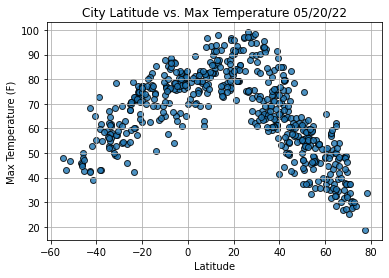

In [42]:
#Import time module.
import time
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig1.png')
#Show plot.
plt.show()

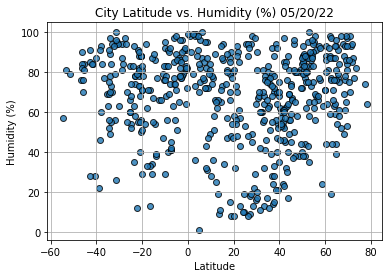

In [46]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
#Show plot.
plt.show()

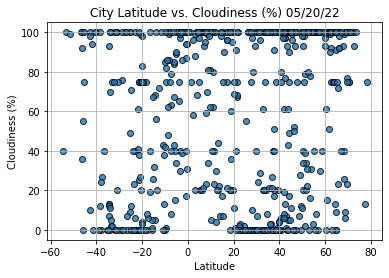

In [45]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig3.png')
#Show plot.
plt.show()

In [ ]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Sp')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
#Show plot.
plt.show()